In [1]:
pip install koreanize-matplotlib


   ---------------------------------------- 0.0/7.9 MB ? eta -:--:--
   -------------- ------------------------- 2.9/7.9 MB 13.9 MB/s eta 0:00:01
   -------------------------------- ------- 6.6/7.9 MB 15.5 MB/s eta 0:00:01
   ---------------------------------------- 7.9/7.9 MB 12.6 MB/s eta 0:00:00


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 데이터 불러오기

file_path = './data/columns중구/merged_df.csv'
df = pd.read_csv(file_path)

# 데이터가 잘 불러와졌는지 확인 (상위 5개 행 출력)
print(df.head())

   대여소_ID  주간  시간대  대여건수  반납건수  총이용건수  잔여자전거수  동일대여소대여반납  중구내대여반납  유출량  유입량
0  ST-116  주말    0     1     2      3       5          0        0    1    2
1  ST-116  주말    1     1     1      2       8          0        0    1    1
2  ST-116  주말    2     4     2      6       6          0        1    3    0
3  ST-116  주말    3     0     0      0       5          0        0    0    0
4  ST-116  주말    4     0     0      0       5          0        0    0    0


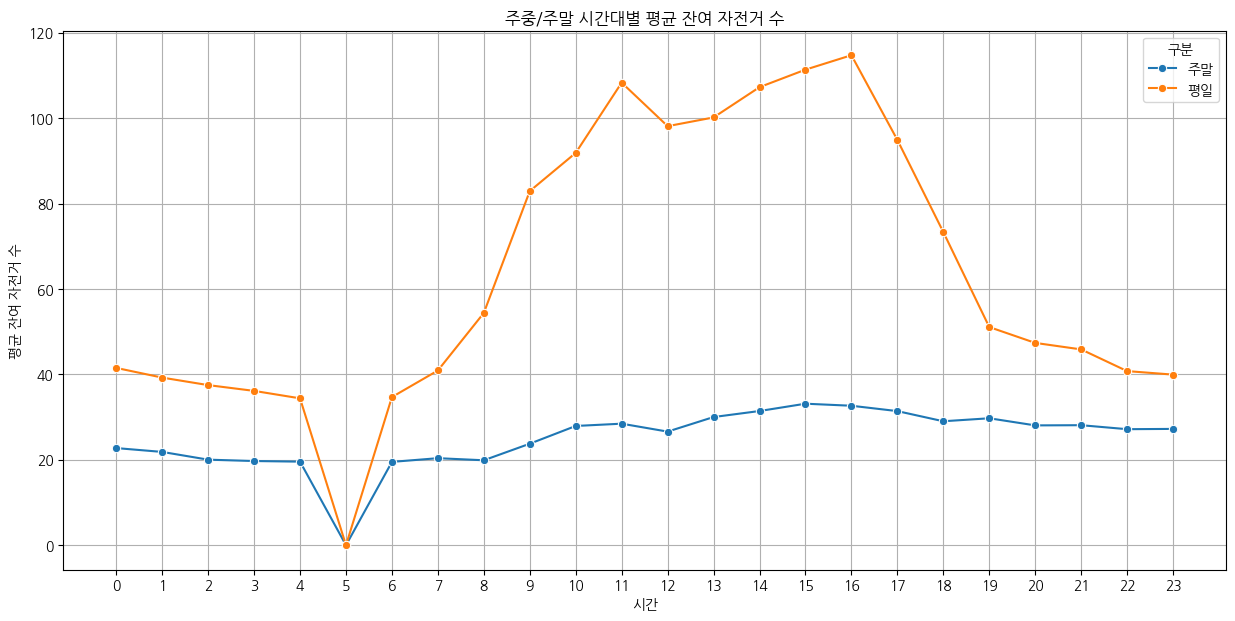

In [5]:
combined_analysis = df.groupby(['주간', '시간대'])['잔여자전거수'].mean().reset_index()

# 주중/주말 시간대별 분석 결과 시각화
plt.figure(figsize=(15, 7))
sns.lineplot(data=combined_analysis, x='시간대', y='잔여자전거수', hue='주간', marker='o')

plt.title('주중/주말 시간대별 평균 잔여 자전거 수')
plt.xlabel('시간')
plt.ylabel('평균 잔여 자전거 수')
plt.legend(title='구분')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

In [7]:
# 1. 주중/주말 및 시간대별로 그룹화하고, 각 그룹 내에서 '잔여자전거수'가 많은 순으로 정렬 후 상위 10개 선택
top_10_list = (df.groupby(['주간', '시간대'])
               .apply(lambda x: x.sort_values(by='잔여자전거수', ascending=False).head(10))
               .reset_index(drop=True))


# 2. 결과 확인 (상위 20개 행만 출력)
print("--- 주중/주말 시간대별 잔여 자전거 수 Top 10 대여소 (샘플) ---")
print(top_10_list.head(20))

# 3. 전체 결과를 CSV 파일로 저장
output_filename = 'top_10_stations_by_hour.csv'
top_10_list.to_csv(output_filename, index=False, encoding='utf-8-sig')

print(f"\n전체 분석 결과가 '{output_filename}' 파일로 저장되었습니다.")

--- 주중/주말 시간대별 잔여 자전거 수 Top 10 대여소 (샘플) ---
     대여소_ID  주간  시간대  대여건수  반납건수  총이용건수  잔여자전거수  동일대여소대여반납  중구내대여반납  유출량  유입량
0   ST-1440  주말    0    31    30     61     157          3        5   23   26
1   ST-3210  주말    0    10     7     17     149          1        5    4    6
2    ST-198  주말    0    64    44    108     118          4       19   41   40
3    ST-946  주말    0    29     9     38     117          0        3   26   10
4   ST-2786  주말    0    20     4     24      97          0        6   14    1
5   ST-1436  주말    0     4     2      6      69          0        0    4    2
6    ST-338  주말    0    15     4     19      61          1        7    7    6
7   ST-1781  주말    0     8     8     16      55          0        1    7    7
8    ST-189  주말    0    25    20     45      51          0        6   19    6
9   ST-2903  주말    0    10    13     23      50          0        2    8   12
10  ST-1440  주말    1    27    30     57     157          4       12   11   16
11  ST-3210  주말    1

C:\Users\user\AppData\Local\Temp\ipykernel_16172\1149482772.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sort_values(by='잔여자전거수', ascending=False).head(10))


In [9]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('./data/columns중구/merged_df.csv')

# --- 1. 대여소 상태 (고갈) 빈도 분석 ---

# '고갈' 상태를 잔여 자전거 2대 이하로 정의
EMPTY_THRESHOLD = 2
df['is_empty'] = df['잔여자전거수'] <= EMPTY_THRESHOLD

# 대여소별 전체 데이터 수 계산
station_counts = df['대여소_ID'].value_counts().reset_index()
station_counts.columns = ['대여소_ID', 'total_records']

# 대여소별 고갈 상태 발생 횟수 계산
empty_counts = df[df['is_empty']].groupby('대여소_ID').size().reset_index(name='empty_count')

In [11]:
# 위 두 데이터를 합치고, 고갈 비율(%)을 계산
status_analysis = pd.merge(station_counts, empty_counts, on='대여소_ID', how='left').fillna(0)
status_analysis['empty_ratio'] = (status_analysis['empty_count'] / status_analysis['total_records']) * 100

# 고갈 비율이 높은 순으로 정렬
status_analysis_sorted = status_analysis.sort_values(by='empty_ratio', ascending=False)

# 결과 출력 및 파일 저장
print("--- 상위 10개 '자전거 고갈' 빈도 높은 대여소 ---")
print(status_analysis_sorted.head(10))
status_analysis_sorted.to_csv('station_status_analysis.csv', index=False, encoding='utf-8-sig')

--- 상위 10개 '자전거 고갈' 빈도 높은 대여소 ---
     대여소_ID  total_records  empty_count  empty_ratio
19   ST-196             48           23    47.916667
5   ST-2519             48           19    39.583333
7   ST-2517             48           15    31.250000
4   ST-2520             48           14    29.166667
6   ST-2518             48           13    27.083333
55   ST-147             48           13    27.083333
59  ST-1437             48           12    25.000000
66   ST-134             48           12    25.000000
1   ST-2526             48           11    22.916667
88  ST-1772             48           11    22.916667


In [13]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv('./data/columns중구/merged_df.csv')

# --- 2. 대여소 안정성 (변동성) 분석 ---

# 대여소 ID로 그룹화하여 잔여 자전거 수의 표준편차(std) 계산
stability_analysis = df.groupby('대여소_ID')['잔여자전거수'].std().reset_index()
stability_analysis.columns = ['대여소_ID', 'remaining_bikes_std']

# 표준편차가 큰 순서(변동성이 큰 순서)로 정렬
stability_analysis_sorted = stability_analysis.sort_values(by='remaining_bikes_std', ascending=False)

In [15]:
# 결과 출력 및 파일 저장
print("\n--- 상위 10개 '가장 변동성이 큰' (불안정한) 대여소 ---")
print(stability_analysis_sorted.head(10))

print("\n--- 상위 10개 '가장 변동성이 적은' (안정적인) 대여소 ---")
print(stability_analysis_sorted.tail(10).sort_values(by='remaining_bikes_std', ascending=True))

stability_analysis_sorted.to_csv('station_stability_analysis.csv', index=False, encoding='utf-8-sig')


--- 상위 10개 '가장 변동성이 큰' (불안정한) 대여소 ---
     대여소_ID  remaining_bikes_std
52  ST-2422           193.860427
42   ST-185           186.776480
72  ST-2693           153.797657
18  ST-1668           145.640570
33  ST-1780           120.888728
24  ST-1771           112.431910
25  ST-1772           108.313029
2    ST-134           101.368080
31  ST-1778            99.266807
12  ST-1440            97.706818

--- 상위 10개 '가장 변동성이 적은' (안정적인) 대여소 ---
     대여소_ID  remaining_bikes_std
40  ST-1790             4.997695
57  ST-2434             5.146093
74  ST-2805             7.348349
28  ST-1775             7.466206
53  ST-2430             7.469056
29  ST-1776             8.808618
79  ST-3161             9.019458
56  ST-2433             9.713972
37  ST-1785             9.736875
84  ST-3305             9.892955
